In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv("full_time_log.csv")

odds_cols = ['home_odds', 'even_odds', 'away_odds', 'over_4_5_cards', 'over_2_5_goals']
df[odds_cols] = df[odds_cols] / 1000

In [22]:
# Implied probabilities
df['prob_home'] = 1 / df['home_odds']
df['prob_draw'] = 1 / df['even_odds']
df['prob_away'] = 1 / df['away_odds']
df['prob_over_2_5'] = 1 / df['over_2_5_goals']
df['prob_over_4_5_cards'] = 1 / df['over_4_5_cards']

# Derived features
df['fav_odds'] = df[['home_odds', 'even_odds', 'away_odds']].min(axis=1)
df['1x2_spread'] = df[['home_odds', 'even_odds', 'away_odds']].max(axis=1) - df['fav_odds']
df['goal_card_ratio'] = df['prob_over_2_5'] / df['prob_over_4_5_cards']
df['goal_bias'] = df['prob_over_2_5'] - df[['prob_home', 'prob_draw', 'prob_away']].mean(axis=1)
df['card_bias'] = df['prob_over_4_5_cards'] - df[['prob_home', 'prob_draw', 'prob_away']].mean(axis=1)
print(df.describe())


           event_id  home_odds  even_odds  away_odds  over_4_5_cards  \
count  9.000000e+00   9.000000   9.000000   9.000000        9.000000   
mean   1.023433e+09   5.996667   6.100000   7.552222        2.414444   
std    7.608565e+05  13.139276   2.809471   5.159118        0.884804   
min    1.022336e+09   1.160000   3.250000   1.040000        1.200000   
25%    1.023169e+09   1.280000   4.350000   2.900000        1.900000   
50%    1.023225e+09   1.400000   6.000000   7.000000        2.100000   
75%    1.024144e+09   2.250000   7.000000   9.500000        3.000000   
max    1.024183e+09  41.000000  12.500000  15.000000        4.200000   

       over_2_5_goals  prob_home  prob_draw  prob_away  prob_over_2_5  \
count        9.000000   9.000000   9.000000   9.000000       9.000000   
mean         1.592222   0.606757   0.190849   0.264797       0.643187   
std          0.279364   0.281828   0.072699   0.288336       0.098256   
min          1.320000   0.024390   0.080000   0.066667     

In [24]:
features = ['prob_home', 'prob_draw', 'prob_away', 'prob_over_2_5', 'prob_over_4_5_cards',
            'fav_odds', '1x2_spread', 'goal_card_ratio', 'goal_bias', 'card_bias']

X = df[features].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X.describe())

       prob_home  prob_draw  prob_away  prob_over_2_5  prob_over_4_5_cards  \
count   9.000000   9.000000   9.000000       9.000000             9.000000   
mean    0.606757   0.190849   0.264797       0.643187             0.465348   
std     0.281828   0.072699   0.288336       0.098256             0.172469   
min     0.024390   0.080000   0.066667       0.454545             0.238095   
25%     0.444444   0.142857   0.105263       0.578035             0.333333   
50%     0.714286   0.166667   0.142857       0.684932             0.476190   
75%     0.781250   0.229885   0.344828       0.714286             0.526316   
max     0.862069   0.307692   0.961538       0.757576             0.833333   

       fav_odds  1x2_spread  goal_card_ratio  goal_bias  card_bias  
count  9.000000    9.000000         9.000000   9.000000   9.000000  
mean   1.504444   10.656667         1.598684   0.289052   0.111213  
std    0.496365   11.953513         0.780889   0.098882   0.173065  
min    1.040000    0.

In [25]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster_kmeans'] = kmeans.fit_predict(X_scaled)


In [33]:
dbscan = DBSCAN(eps=1.2, min_samples=1)
df['cluster_dbscan'] = dbscan.fit_predict(X_scaled)


In [34]:
score_kmeans = silhouette_score(X_scaled, df['cluster_kmeans'])
score_dbscan = silhouette_score(X_scaled, df['cluster_dbscan'][df['cluster_dbscan'] != -1])

print(f"KMeans Silhouette Score: {score_kmeans:.2f}")
print(f"DBSCAN Silhouette Score (utan outliers): {score_dbscan:.2f}")


KMeans Silhouette Score: 0.37
DBSCAN Silhouette Score (utan outliers): 0.34


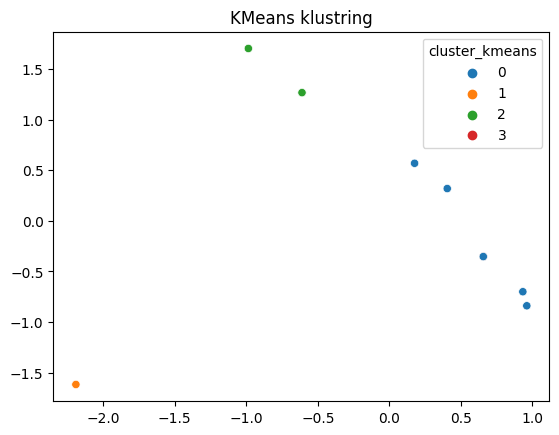

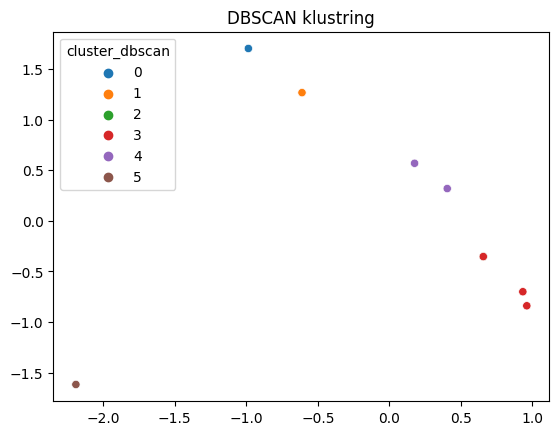

In [35]:
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['cluster_kmeans'], palette='tab10')
plt.title("KMeans klustring")
plt.show()

sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['cluster_dbscan'], palette='tab10')
plt.title("DBSCAN klustring")
plt.show()


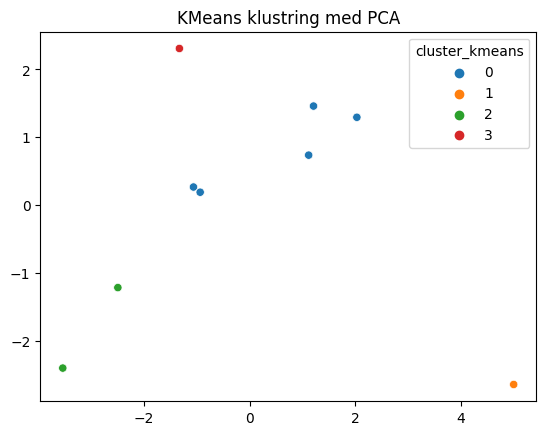

,prob_home,prob_draw,prob_away,prob_over_2_5,prob_over_4_5_cards,fav_odds,1x2_spread,goal_card_ratio,goal_bias,card_bias
cluster_kmeans,,,,,,,,,,
0,0.77,0.18,0.11,0.67,0.41,1.31,9.11,1.70,0.31,0.05
1,0.02,0.08,0.96,0.76,0.24,1.04,39.96,3.18,0.40,-0.12
2,0.39,0.29,0.38,0.51,0.54,2.34,1.08,0.94,0.15,0.19
3,0.78,0.17,0.11,0.68,0.83,1.28,8.22,0.82,0.33,0.48


In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster_kmeans'], palette='tab10')
plt.title("KMeans klustring med PCA")
plt.show()

df.groupby('cluster_kmeans')[features].mean().round(2)

In [39]:

# Definiera tolkningar för varje kluster
kluster_tolkning = {
    0: {
        'typ': 'Hemmastyrd offensiv match',
        'beskrivning': 'Starkt hemmalag, hög målförväntan, låg fysisk intensitet.'
    },
    1: {
        'typ': 'Bortadominans med offensiv prägel',
        'beskrivning': 'Starkt bortalag, hög målförväntan, låg fysisk kontakt.'
    },
    2: {
        'typ': 'Jämn och balanserad match',
        'beskrivning': 'Likvärdiga lag, måttlig offensiv och fysisk intensitet.'
    },
    3: {
        'typ': 'Hemmastyrd fysisk offensiv',
        'beskrivning': 'Starkt hemmalag, både offensiv och fysisk förväntan.'
    }
}

# Iterera över varje match
for _, row in df.iterrows():
    match = row['match_name']
    start = row['event_start']
    cluster = row['cluster_col']
    
    if cluster in kluster_tolkning:
        typ = kluster_tolkning[cluster]['typ']
        beskrivning = kluster_tolkning[cluster]['beskrivning']
    else:
        typ = "Okänt kluster"
        beskrivning = "Ingen tolkning tillgänglig."

    print(f"📅 {start} – ⚽ {match}")
    print(f"🧠 Kluster: {cluster} – {typ}")
    print(f"📝 Förväntad matchbild: {beskrivning}")
    print("-" * 60)

KeyError: 'cluster_col'